In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV


In [33]:
sns.set_style("whitegrid")

In [58]:
df= pd.read_csv('stage2.csv',index_col=0)

In [59]:
col= ['Entity','Year']
for i in col:
    del df[i]

In [51]:
df.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.861703,4413.062005,60.0,652230.0
1,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.861703,4413.062005,60.0,652230.0
2,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.861703,179.426579,60.0,652230.0
3,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0
4,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0


# Using isloation forest

In [10]:
from sklearn.ensemble import IsolationForest

In [44]:
ir=IsolationForest(contamination=0.05)

In [45]:
ir.fit(df)

IsolationForest(contamination=0.05)

In [46]:
outcome= ir.predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
df= df[outcome==1]

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

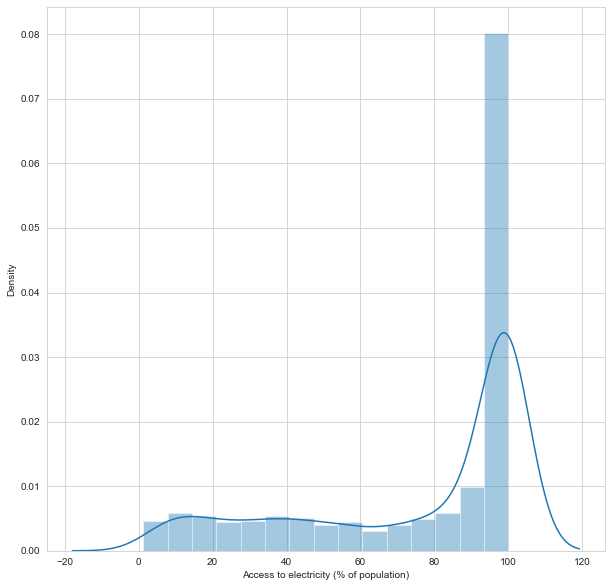

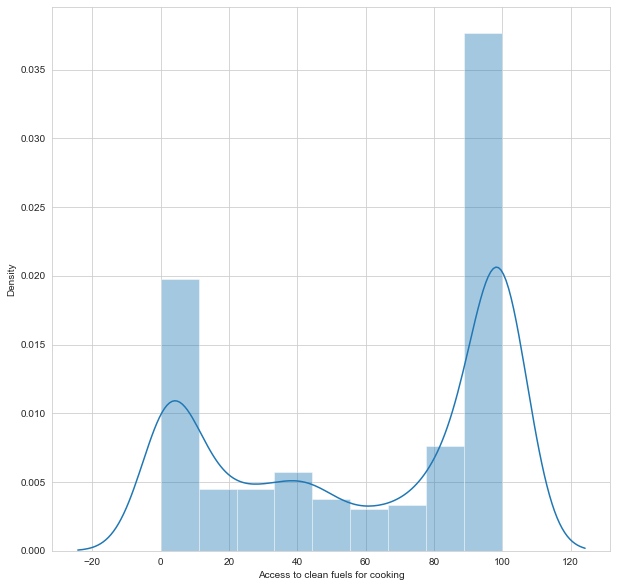

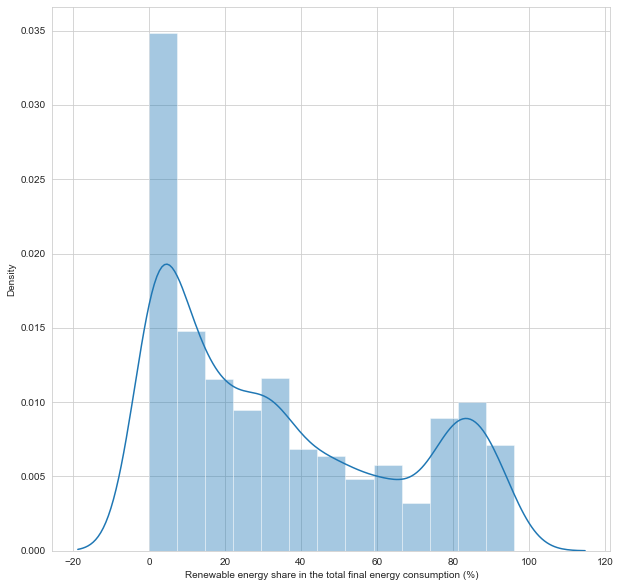

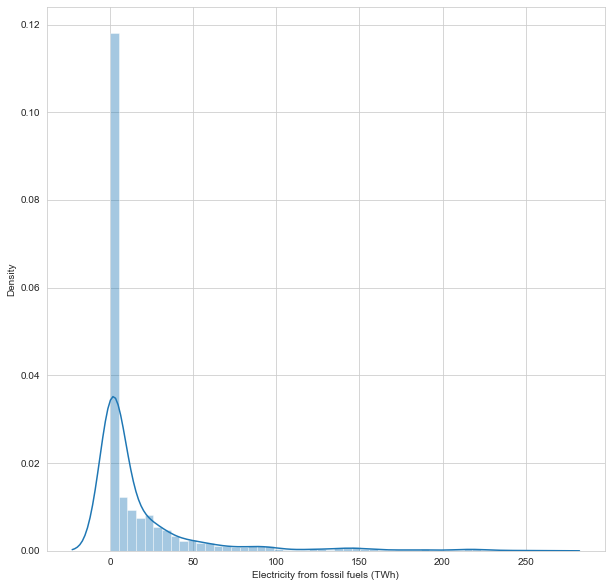

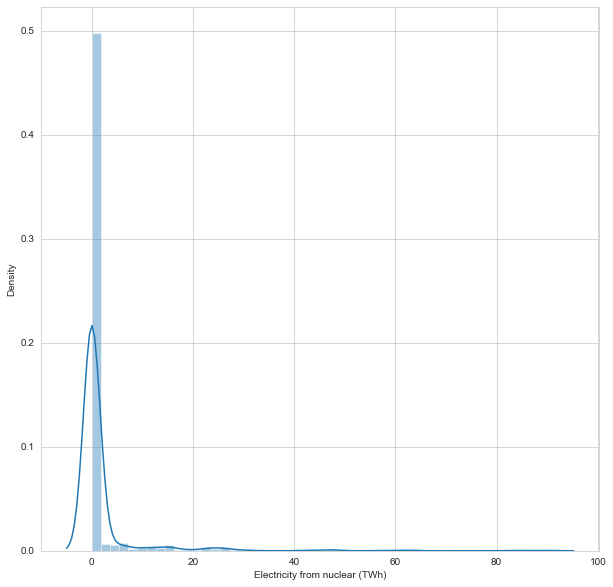

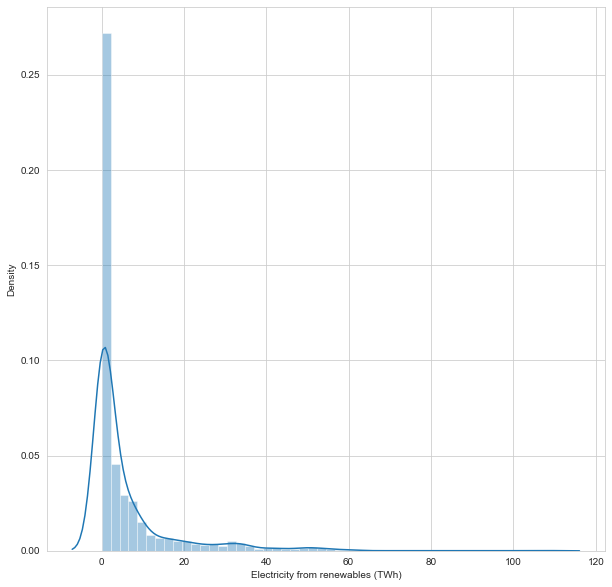

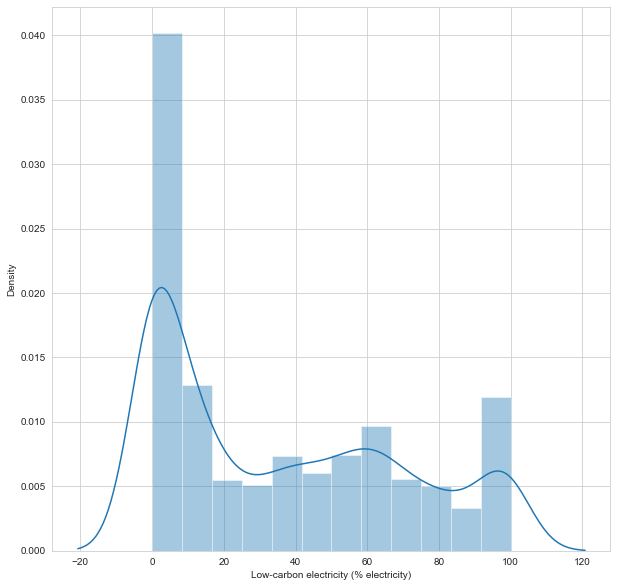

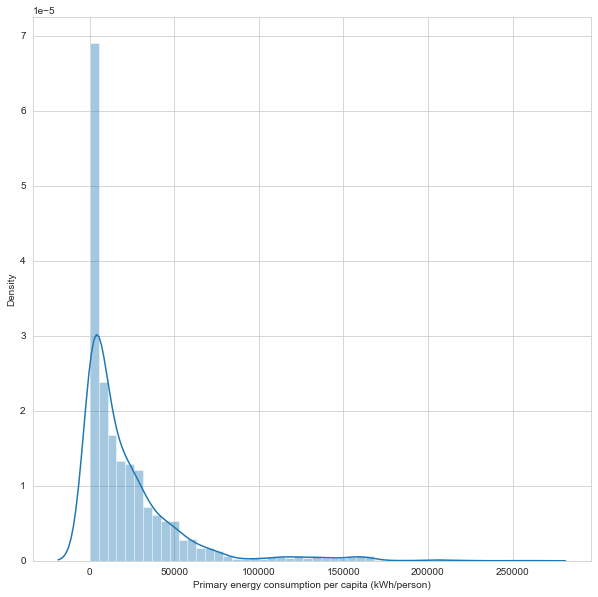

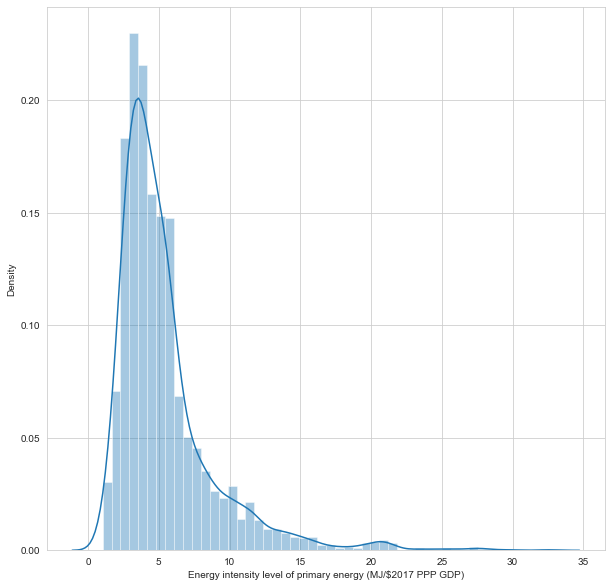

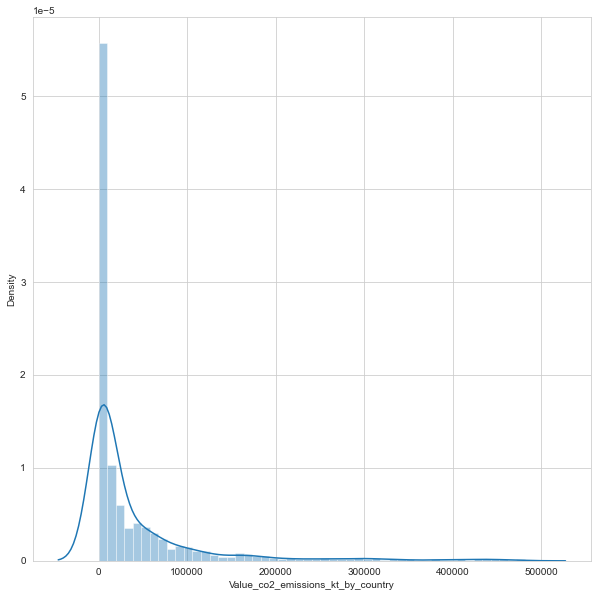

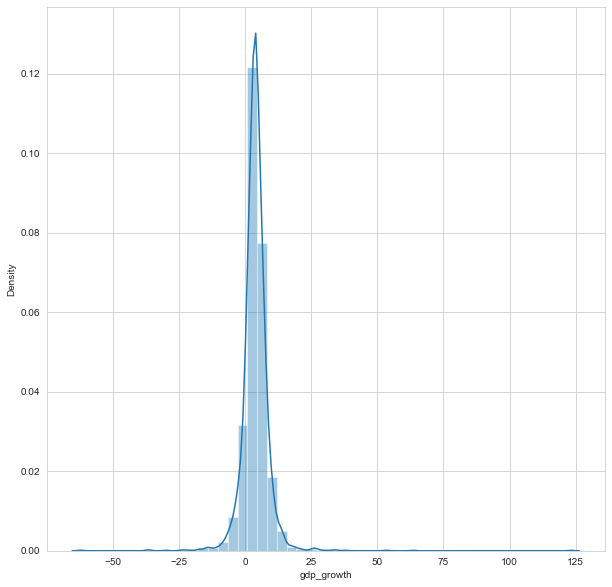

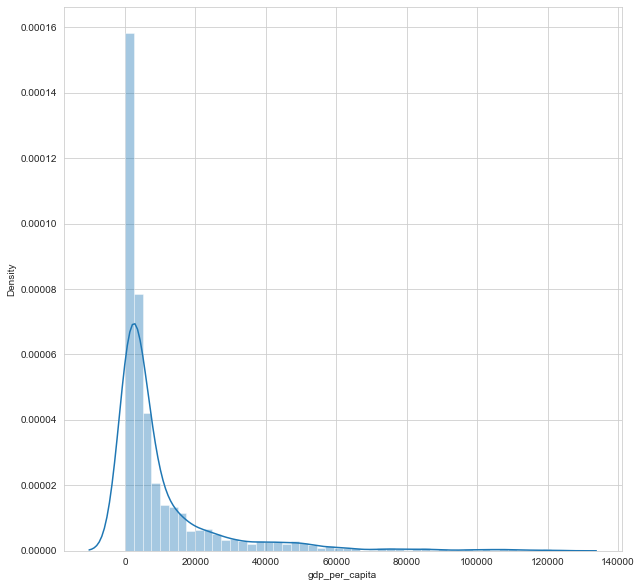

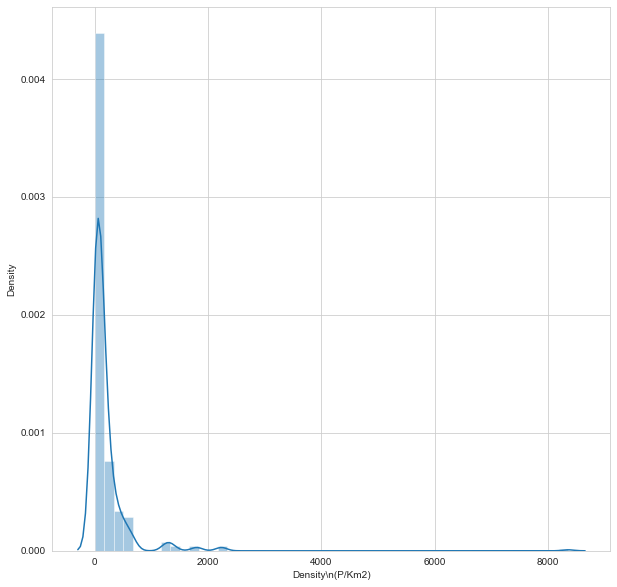

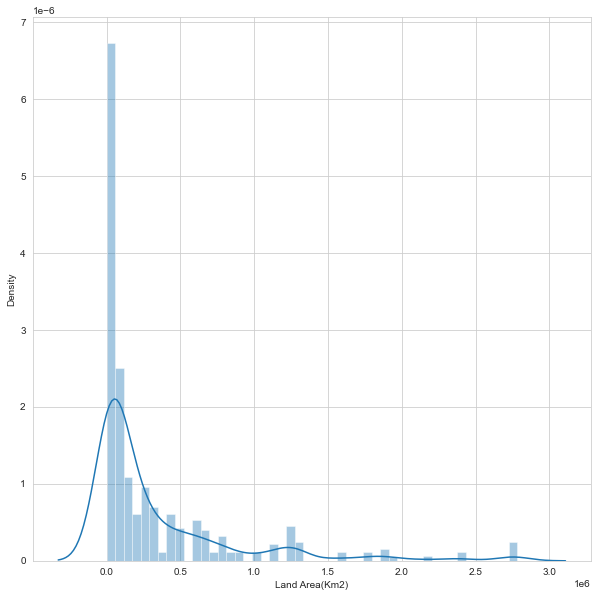

In [48]:
col= df.columns
for i in col:
    plt.figure(figsize=(10,10))
    sns.distplot(df[i],kde=True)

# IQR

In [60]:
Q1=df['Value_co2_emissions_kt_by_country'].quantile(0.25)
Q3=df['Value_co2_emissions_kt_by_country'].quantile(0.75)

IQR=Q3-Q1

LB= Q1-2*IQR
UB= Q3+2*IQR

df= df[(df['Value_co2_emissions_kt_by_country']>LB) & df['Value_co2_emissions_kt_by_country']<UB]

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

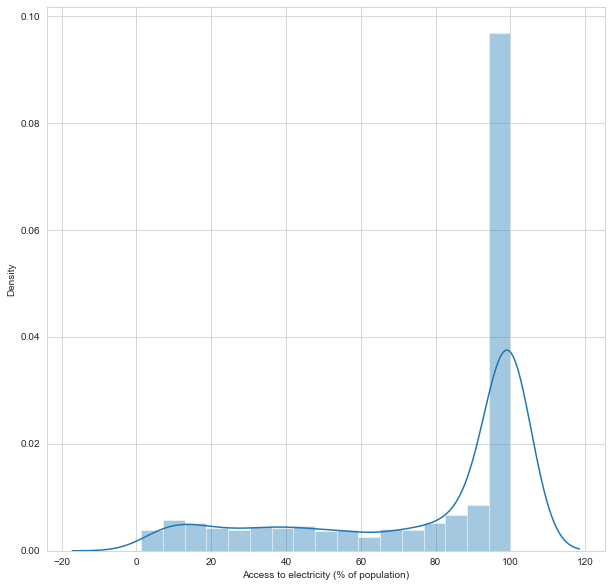

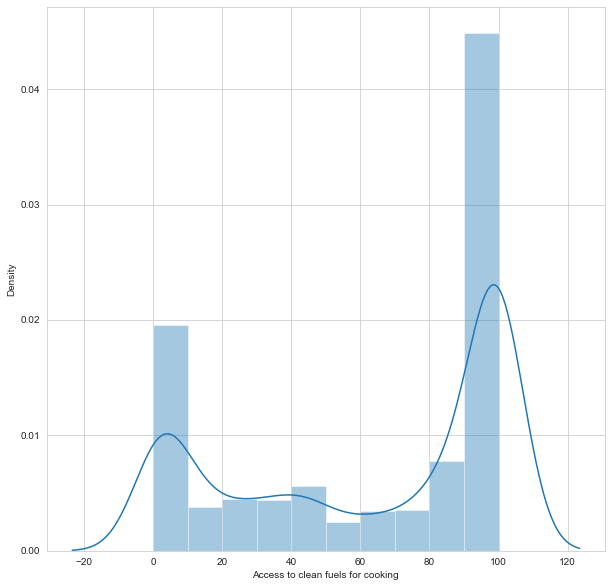

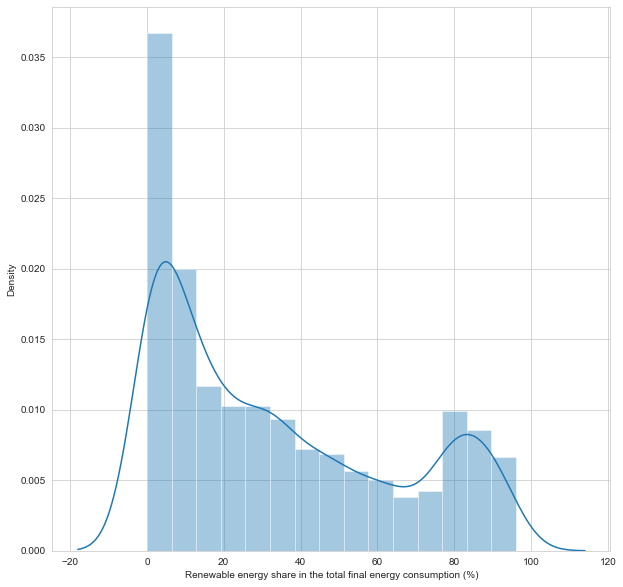

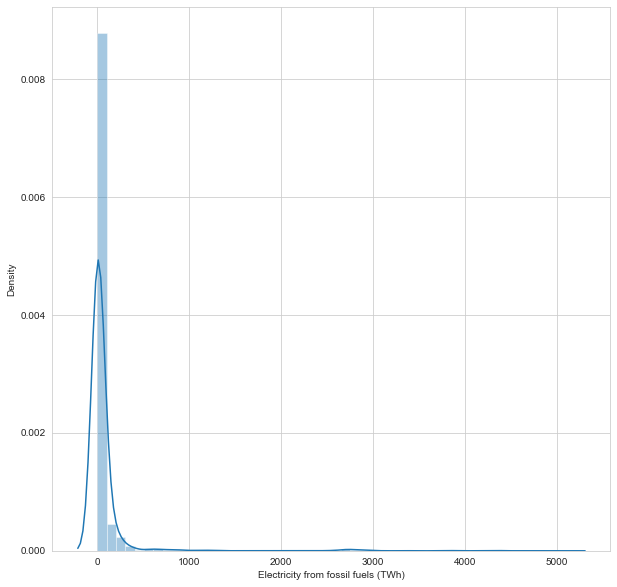

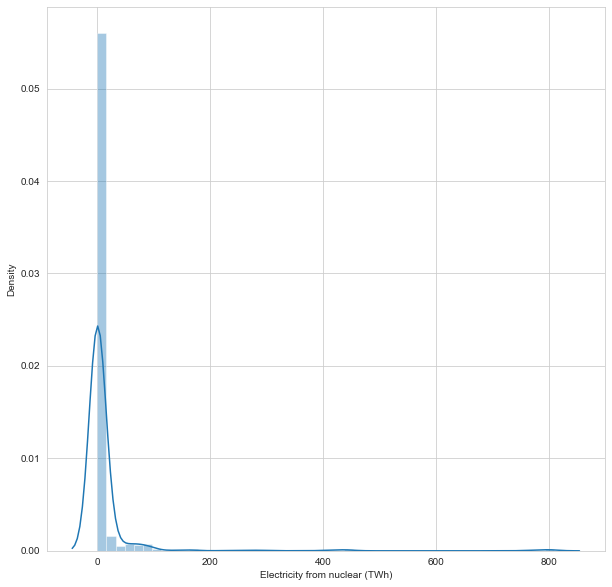

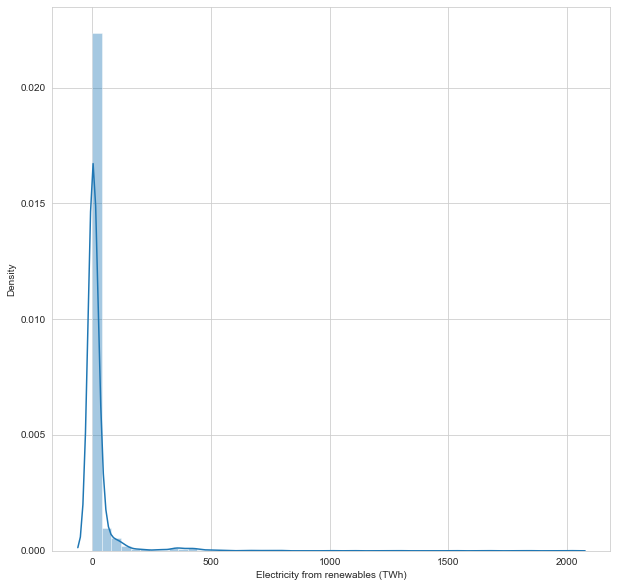

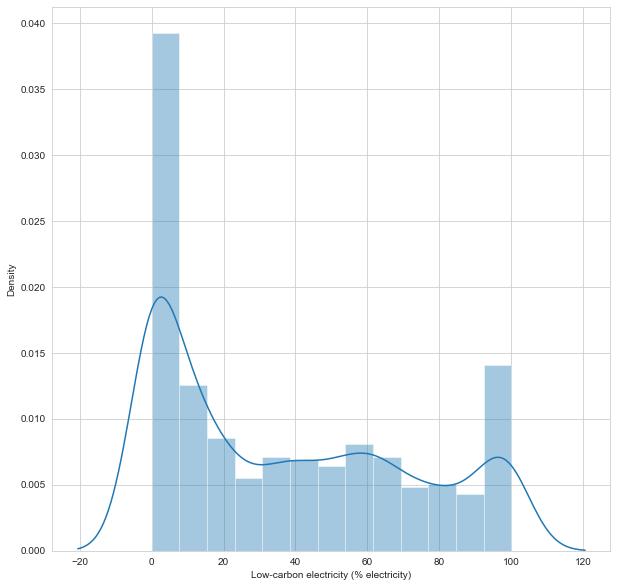

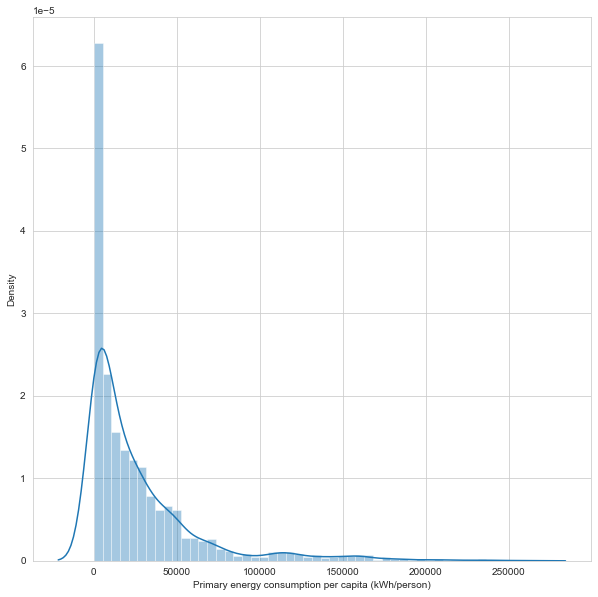

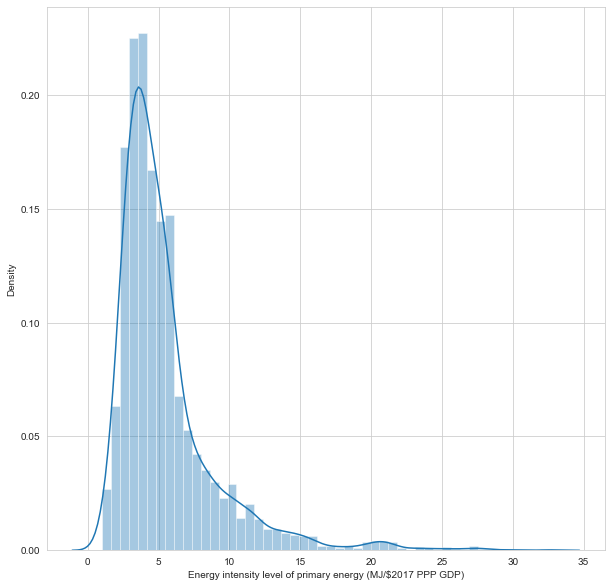

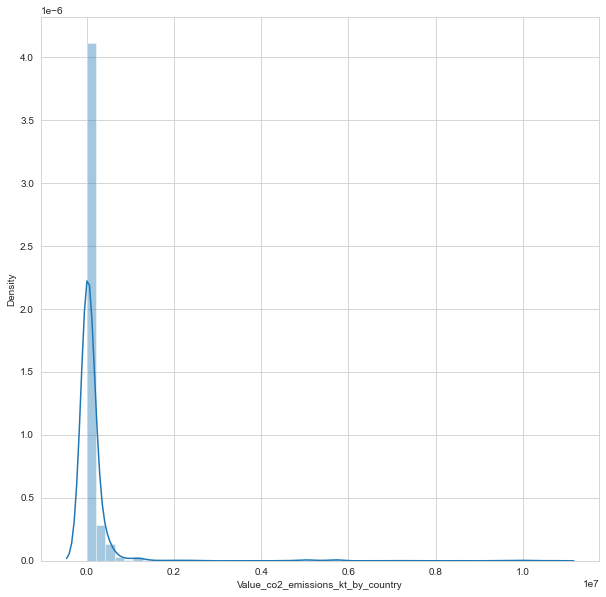

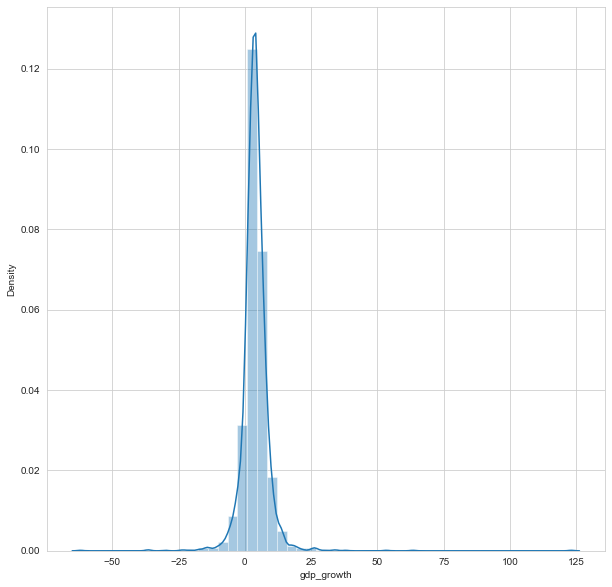

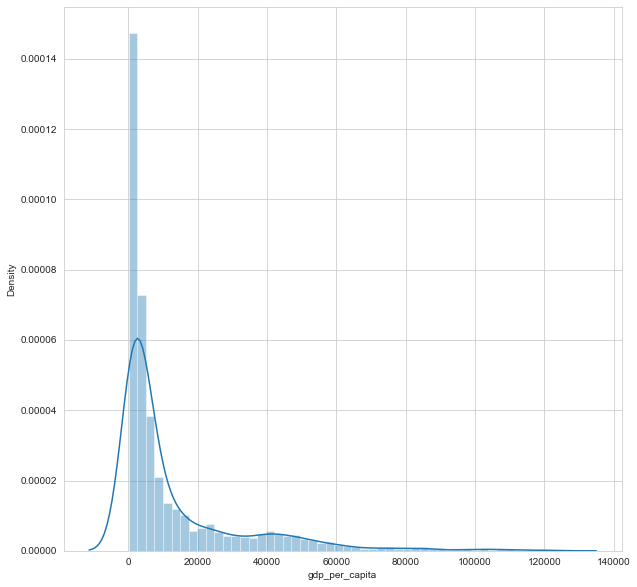

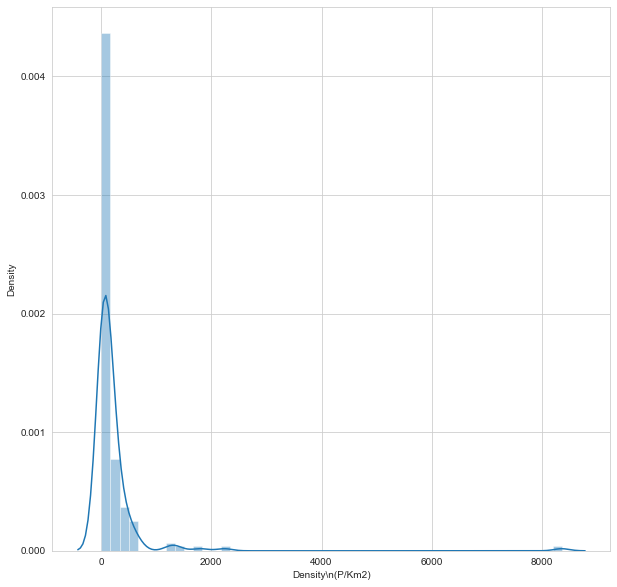

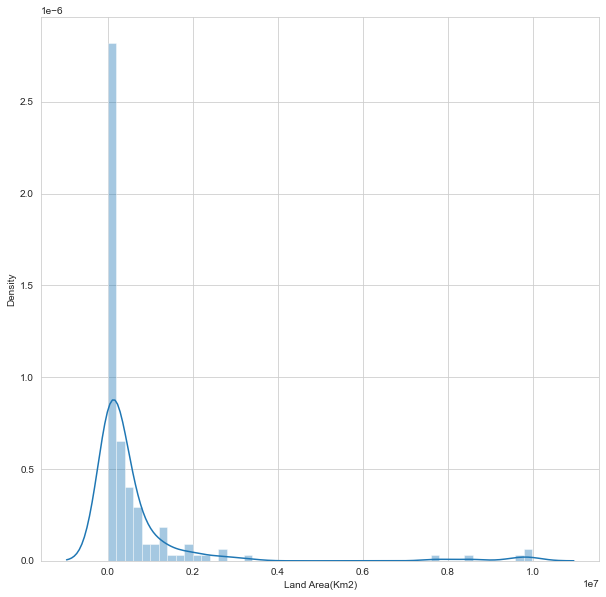

In [61]:
col= df.columns
for i in col:
    plt.figure(figsize=(10,10))
    sns.distplot(df[i],kde=True)